In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [126]:
data_train = pd.read_csv('titanic_train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


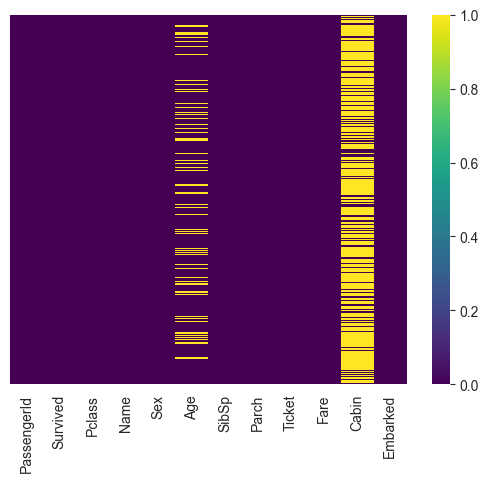

In [127]:
sns.heatmap(data_train.isnull(), yticklabels = False, linecolor= 'white', cbar = True, vmin = 0, vmax = 1, cmap = 'viridis')
plt.show()

In [128]:
sns.set_style('darkgrid')

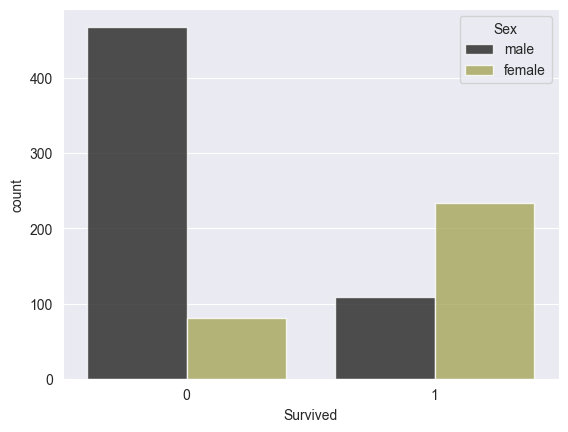

In [129]:
sns.countplot(x='Survived', data = data_train, hue='Sex', palette='dark:yellow', saturation= 0.3, alpha = 0.8)
plt.show()

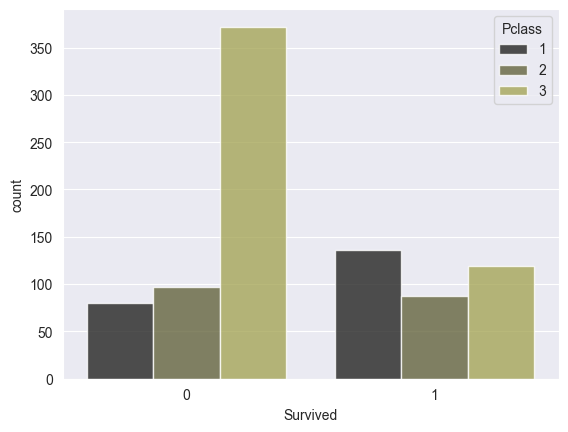

In [130]:
sns.countplot(x='Survived', data = data_train, hue='Pclass', palette='dark:yellow', saturation= 0.3, alpha = 0.8)
plt.show()

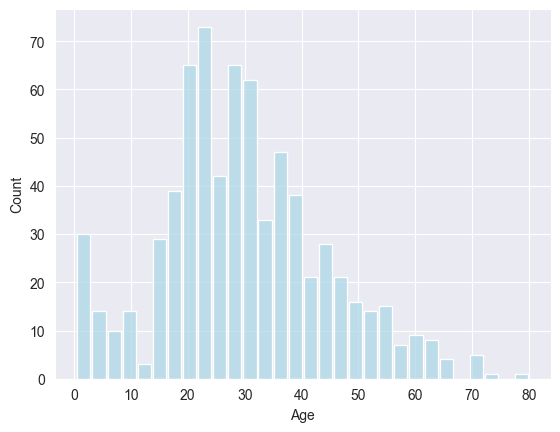

In [131]:
sns.histplot(data_train['Age'].dropna(), kde=False, color='lightblue', bins= 30, shrink=0.87)
plt.show()

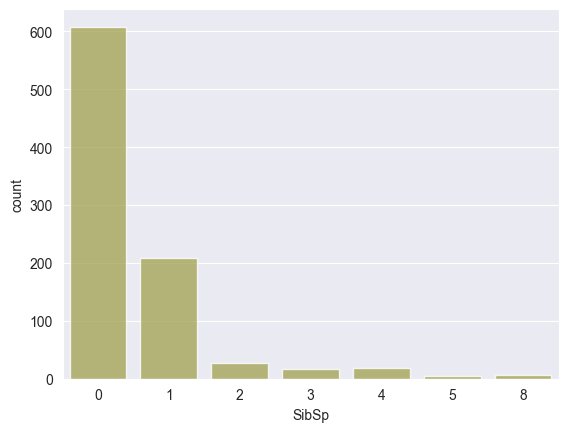

In [132]:
sns.countplot(data=data_train, x='SibSp', color='yellow',saturation= 0.3, alpha = 0.8)
plt.show()

Imputation, replacing the amount of null values in dataset.

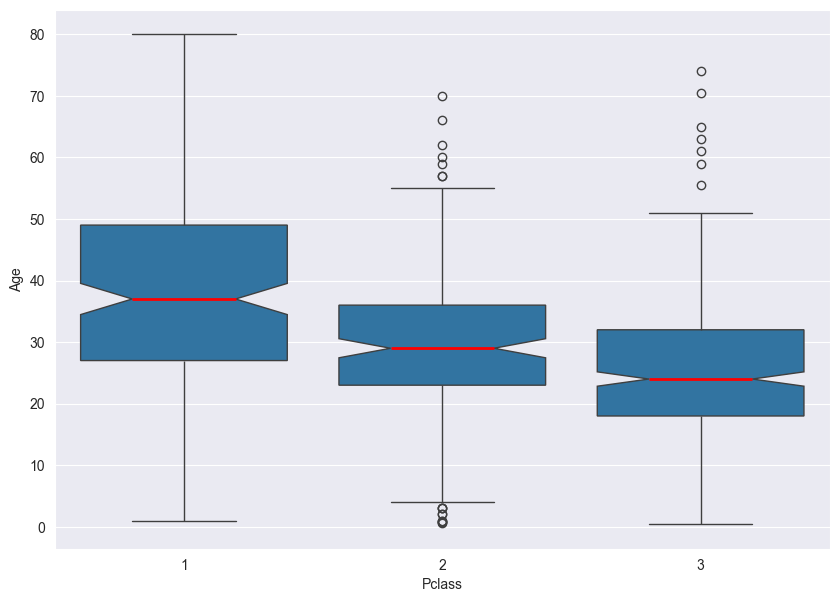

In [133]:
plt.figure(figsize=(10,7))
sns.boxplot(data = data_train, x= 'Pclass', y= 'Age', notch = True, medianprops = {"color" : "r", 'linewidth':2})
plt.show()

In [134]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            29
        else:
            return 24
    else:
        return Age

In [135]:
data_train['Age'] = data_train[['Age', 'Pclass']].apply(impute_age, axis=1)

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_7776/3439005202.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_7776/3439005202.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


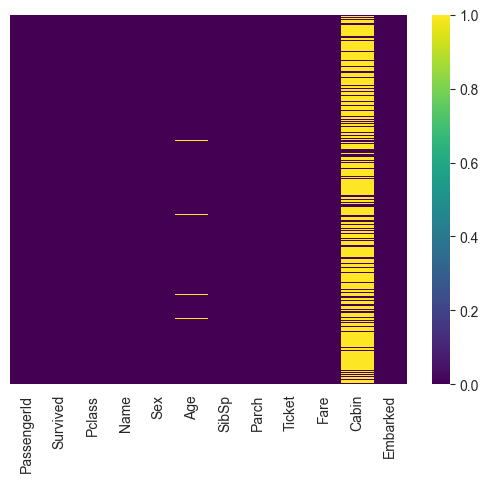

In [136]:
sns.heatmap(data_train.isnull(), yticklabels = False, linecolor= 'white', cbar = True, vmin = 0, vmax = 1, cmap = 'viridis')
plt.show()

In [137]:
data_train['Age'].isnull().value_counts()

Age
False    880
True      11
Name: count, dtype: int64

In [138]:
data_train.drop('Cabin', axis=1, inplace=True)

In [139]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [140]:
data_train.dropna(inplace=True)

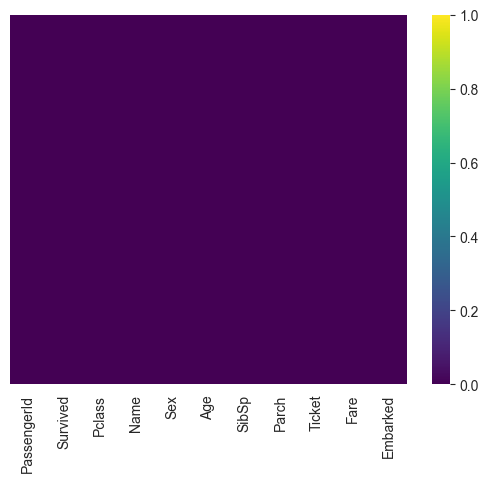

In [141]:
sns.heatmap(data_train.isnull(), yticklabels = False, linecolor= 'white', cbar = True, vmin = 0, vmax = 1, cmap = 'viridis')
plt.show()

Convert categorical features into numerical values

In [142]:
sex = pd.get_dummies(data_train['Sex'], drop_first=True, dtype=float)
sex.head()

,male
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [143]:
embark = pd.get_dummies(data_train['Embarked'], drop_first=True, dtype=float)

In [144]:
data_train = pd.concat([data_train,sex,embark], axis=1)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0,0.0,1.0


In [145]:
data_train.drop(['PassengerId', 'Sex', 'Ticket', 'Embarked', 'Name'], axis=1, inplace=True)
data_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [147]:
data_train.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
male        float64
Q           float64
S           float64
dtype: object

In [148]:
data_train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [169]:
X = data_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q','S']]
y = data_train['Survived']

Logistic Regression

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
logmodel = LogisticRegression()

In [156]:
logmodel.fit(X_train, y_train)

/opt/anaconda3/envs/DataScience/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [157]:
predictions = logmodel.predict(X_test)
predictions

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0])

In [161]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [160]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       159
           1       0.75      0.73      0.74       105

    accuracy                           0.80       264
   macro avg       0.79      0.79      0.79       264
weighted avg       0.80      0.80      0.80       264



In [162]:
print(confusion_matrix(y_test, predictions))

[[134  25]
 [ 28  77]]


In [163]:
y_test.value_counts()

Survived
0    159
1    105
Name: count, dtype: int64

In [167]:
null_accuracy = (159/(159+150))
print('Null accuracy value: {0:0.4f}'. format(null_accuracy))

Null accuracy value: 0.5146
